In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
import os
import kagglehub

path = kagglehub.dataset_download('rkiattisak/sports-car-prices-dataset')
csv = os.path.join(path, 'Sport car price.csv')

df = pd.read_csv(csv)

In [95]:
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [96]:
df.shape

(1007, 8)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [98]:
df.describe()

,Year
count,1007.000000
mean,2021.201589
std,2.019802
min,1965.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


In [99]:
print('Data before dropping duplicates: ', df.shape)
df.drop_duplicates(inplace=True)
print('Data after dropping duplicates: ', df.shape)

Data before dropping duplicates:  (1007, 8)
Data after dropping duplicates:  (719, 8)


In [100]:
df.isnull().sum()

,0
Car Make,0
Car Model,0
Year,0
Engine Size (L),10
Horsepower,0
Torque (lb-ft),3
0-60 MPH Time (seconds),0
Price (in USD),0


In [101]:
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [102]:
df['Horsepower'].unique()

array(['379', '630', '661', '562', '710', '617', '523', '490', '760',
       '600', '1500', '717', '296', '1280', '471', '416', '454', '300',
       '505', '320', '626', '671', '622', '720', '1914', '414', '759',
       '986', '591', '503', '650', '660', '350', '641', '611', '394',
       '612', '369', '603', '455', '460', '325', '349', '592', '444',
       '405', '797', '770', '332', '473', '480', '573', '380', '1600',
       '181', '620', '764', '624', '1000+', '382', '800', '715', '690',
       '730', '469', '365', '401', '645', '435', '1020', '500', '780',
       '750', '402', '575', '729', '789', '577', '495', '237', '310',
       '791', '1874', '542', '368', '616', '1479', '755', '1,000+', '288',
       '1888', '10000+', '482', '1973', '1262', '1035', '819', '385',
       '647', '1200', '1578', '625', '583', '429', '563', '400', '707',
       '887', '1972', '305', '640', '255', '689', '372', '1000', '2000',
       '550', '10,000', '1,500', '10,000+', '485', '1,020', '1872', '621'

In [103]:
df['Torque (lb-ft)'].unique()

array(['331', '443', '561', '406', '568', '553', '494', '465', '625',
       '481', '516', '1180', '656', '295', '1015', '398', '317', '384',
       '280', '243', '664', '531', '468', '737', '738', '1696', '309',
       '590', '479', '650', '550', '276', '626', '369', '420', '627',
       '455', '505', '560', '457', '707', '270', '354', '476', '339',
       '1106', '151', '605', '368', '723', '642', '509', '604', '507',
       '513', '600', '440', '1050', '708', '774', '254', '663', '332',
       '530', '470', '258', '290', '413', '1732', '376', '-', '10,000+',
       '236', '0', '472', '1254', '848', '1300', '442', '641', '498',
       '350', nan, '944', '268', '184', '400', '263', '7,376', '1,180',
       '475', '1,050', '740', '538'], dtype=object)

In [104]:
df['0-60 MPH Time (seconds)'].unique()

array(['4', '2.8', '3', '3.2', '2.7', '3.1', '3.8', '3.5', '2.5', '2.4',
       '5.4', '4.4', '4.8', '4.7', '3.6', '4.1', '1.85', '4.5', '3.3',
       '3.9', '4.2', '3.4', '5.1', '4.3', '2.9', '5', '5.3', '4.9', '6.5',
       '3.7', '1.95', '1.9', '1.98', '2.6', '2.3', '4.6', '< 1.9', '1.8',
       '2.1', '5.2', '2.2', '6.4', '2'], dtype=object)

In [105]:
df['Price (in USD)'].unique()

array(['101,200', '274,390', '333,750', '142,700', '298,000', '130,000',
       '118,500', '59,900', '81,000', '212,000', '201,495', '3,000,000',
       '61,000', '70,100', '2,800,000', '92,950', '104,450', '150,000',
       '62,000', '78,000', '75,000', '225,000', '248,000', '155,000',
       '2,400,000', '100,200', '517,770', '625,000', '117,000', '72,800',
       '222,000', '64,695', '500,000', '45,690', '104,000', '218,000',
       '57,000', '210,000', '148,500', '132,000', '58,900', '518,000',
       '56,200', '192,500', '71,800', '68,000', '42,500', '39,000',
       '46,100', '142,100', '105,000', '87,200', '52,500', '241,000',
       '103,500', '146,000', '75,400', '42,900', '78,595', '62,750',
       '417,826', '150,980', '30,090', '88,700', '67,600', '274,280',
       '52,915', '218,009', '159,495', '142,086', '219,800', '74,290',
       '71,900', '134,300', '26,830', '213,195', '221,580', '100,550',
       '330,000', '200,000', '43,090', '1,700,000', '60,500', '522,000',
    

Cleaning 'Engine Size (L)' feature

In [106]:
conditions = [
    df['Engine Size (L)'].str.contains('Electric', case=False, na=False),
    df['Engine Size (L)'].str.contains('Hybrid', case=False, na=False),
    df['Engine Size (L)'].str.fullmatch(r'[\d\.]+', na=False),
    df['Engine Size (L)'].isin(['-', '0', np.nan]) | df['Engine Size (L)'].isna()
]
choices = [
    'Electric',
    'Hybrid',
    'Combustion',
    'Unknow'
]

df['Engine Type'] = np.select(conditions, choices, default='Combustion')

In [107]:
df['Engine Displacement'] = df['Engine Size (L)'].str.extract(r'(\d+\.?\d*)').astype(float)

In [108]:
df.loc[df['Engine Type'] == 'Electric', 'Engine Displacement'] = 0
df.loc[df['Engine Type'] == 'Unknow', 'Engine Displacement'] = np.nan

In [109]:
df.loc[df['Engine Type'] == 'Unknow', 'Engine Type'] = np.nan

In [110]:
df.drop(columns=['Engine Size (L)'], inplace=True)

In [111]:
df

,Car Make,Car Model,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Type,Engine Displacement
0,Porsche,911,2022,379,331,4,"101,200",Combustion,3.0
1,Lamborghini,Huracan,2021,630,443,2.8,"274,390",Combustion,5.2
2,Ferrari,488 GTB,2022,661,561,3,"333,750",Combustion,3.9
3,Audi,R8,2022,562,406,3.2,"142,700",Combustion,5.2
4,McLaren,720S,2021,710,568,2.7,"298,000",Combustion,4.0
...,...,...,...,...,...,...,...,...,...
999,Nissan,370Z,2021,332,270,5.1,"30,090",Combustion,3.7
1002,Koenigsegg,Jesko,2022,1280,1106,2.5,"3,000,000",Combustion,5.0
1003,Lotus,Evija,2021,1972,1254,2,"2,000,000",Electric,0.0
1005,Pagani,Huayra,2021,764,738,3,"2,600,000",Combustion,6.0


Cleaning 'Horsepower' feature

In [112]:
df['Horsepower'] = df['Horsepower'].str.replace(',', '')
df['Horsepower'] = df['Horsepower'].str.extract(r'(\d+)').astype(int)

In [113]:
df['Horsepower'].unique()

array([  379,   630,   661,   562,   710,   617,   523,   490,   760,
         600,  1500,   717,   296,  1280,   471,   416,   454,   300,
         505,   320,   626,   671,   622,   720,  1914,   414,   759,
         986,   591,   503,   650,   660,   350,   641,   611,   394,
         612,   369,   603,   455,   460,   325,   349,   592,   444,
         405,   797,   770,   332,   473,   480,   573,   380,  1600,
         181,   620,   764,   624,  1000,   382,   800,   715,   690,
         730,   469,   365,   401,   645,   435,  1020,   500,   780,
         750,   402,   575,   729,   789,   577,   495,   237,   310,
         791,  1874,   542,   368,   616,  1479,   755,   288,  1888,
       10000,   482,  1973,  1262,  1035,   819,   385,   647,  1200,
        1578,   625,   583,   429,   563,   400,   707,   887,  1972,
         305,   640,   255,   689,   372,  2000,   550,   485,  1872,
         621])

In [114]:
df['Horsepower'].info()

<class 'pandas.core.series.Series'>
Index: 719 entries, 0 to 1006
Series name: Horsepower
Non-Null Count  Dtype
--------------  -----
719 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


Clean Torque (lb-ft) feature

In [115]:
df.loc[df['Torque (lb-ft)'] == '-', 'Torque (lb-ft)'] = np.nan

In [116]:
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace(',', '')
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.extract(r'(\d+)').astype('Int64')

In [117]:
df['Torque (lb-ft)'].unique()

<IntegerArray>
[  331,   443,   561,   406,   568,   553,   494,   465,   625,   481,   516,
  1180,   656,   295,  1015,   398,   317,   384,   280,   243,   664,   531,
   468,   737,   738,  1696,   309,   590,   479,   650,   550,   276,   626,
   369,   420,   627,   455,   505,   560,   457,   707,   270,   354,   476,
   339,  1106,   151,   605,   368,   723,   642,   509,   604,   507,   513,
   600,   440,  1050,   708,   774,   254,   663,   332,   530,   470,   258,
   290,   413,  1732,   376,  <NA>, 10000,   236,     0,   472,  1254,   848,
  1300,   442,   641,   498,   350,   944,   268,   184,   400,   263,  7376,
   475,   740,   538]
Length: 91, dtype: Int64

In [118]:
df['Torque (lb-ft)'].info()

<class 'pandas.core.series.Series'>
Index: 719 entries, 0 to 1006
Series name: Torque (lb-ft)
Non-Null Count  Dtype
--------------  -----
715 non-null    Int64
dtypes: Int64(1)
memory usage: 11.9 KB


Clean '0-60 MPH Time (seconds)' feature

In [119]:
df.loc[df['0-60 MPH Time (seconds)'] == '< 1.9', '0-60 MPH Time (seconds)'] = '1.8'
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(float)

In [120]:
df['0-60 MPH Time (seconds)'].unique()

array([4.  , 2.8 , 3.  , 3.2 , 2.7 , 3.1 , 3.8 , 3.5 , 2.5 , 2.4 , 5.4 ,
       4.4 , 4.8 , 4.7 , 3.6 , 4.1 , 1.85, 4.5 , 3.3 , 3.9 , 4.2 , 3.4 ,
       5.1 , 4.3 , 2.9 , 5.  , 5.3 , 4.9 , 6.5 , 3.7 , 1.95, 1.9 , 1.98,
       2.6 , 2.3 , 4.6 , 1.8 , 2.1 , 5.2 , 2.2 , 6.4 , 2.  ])

Clean 'Price (in USD)' feature

In [121]:
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(int)

In [122]:
df['Price (in USD)'].unique()

array([ 101200,  274390,  333750,  142700,  298000,  130000,  118500,
         59900,   81000,  212000,  201495, 3000000,   61000,   70100,
       2800000,   92950,  104450,  150000,   62000,   78000,   75000,
        225000,  248000,  155000, 2400000,  100200,  517770,  625000,
        117000,   72800,  222000,   64695,  500000,   45690,  104000,
        218000,   57000,  210000,  148500,  132000,   58900,  518000,
         56200,  192500,   71800,   68000,   42500,   39000,   46100,
        142100,  105000,   87200,   52500,  241000,  103500,  146000,
         75400,   42900,   78595,   62750,  417826,  150980,   30090,
         88700,   67600,  274280,   52915,  218009,  159495,  142086,
        219800,   74290,   71900,  134300,   26830,  213195,  221580,
        100550,  330000,  200000,   43090, 1700000,   60500,  522000,
         67000,  212500,   64000,   31015,  304995,  190000,  115000,
         59000,  102100,  220300,  114000,  239100,   62500,   65290,
        219750,  187

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 719 non-null    object 
 1   Car Model                719 non-null    object 
 2   Year                     719 non-null    int64  
 3   Horsepower               719 non-null    int64  
 4   Torque (lb-ft)           715 non-null    Int64  
 5   0-60 MPH Time (seconds)  719 non-null    float64
 6   Price (in USD)           719 non-null    int64  
 7   Engine Type              708 non-null    object 
 8   Engine Displacement      706 non-null    float64
dtypes: Int64(1), float64(2), int64(3), object(3)
memory usage: 56.9+ KB


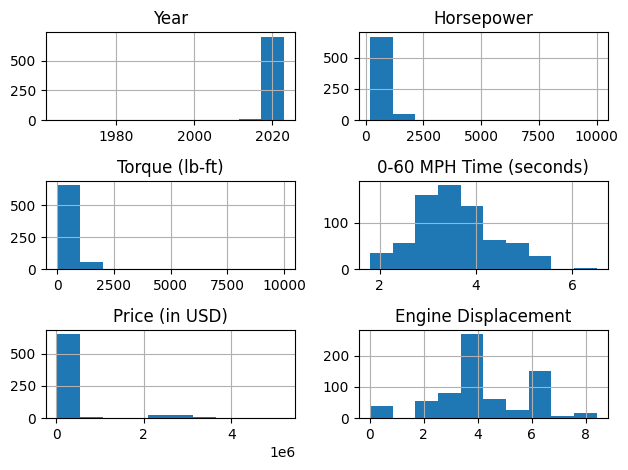

In [124]:
df.hist()
plt.tight_layout()

<Axes: >

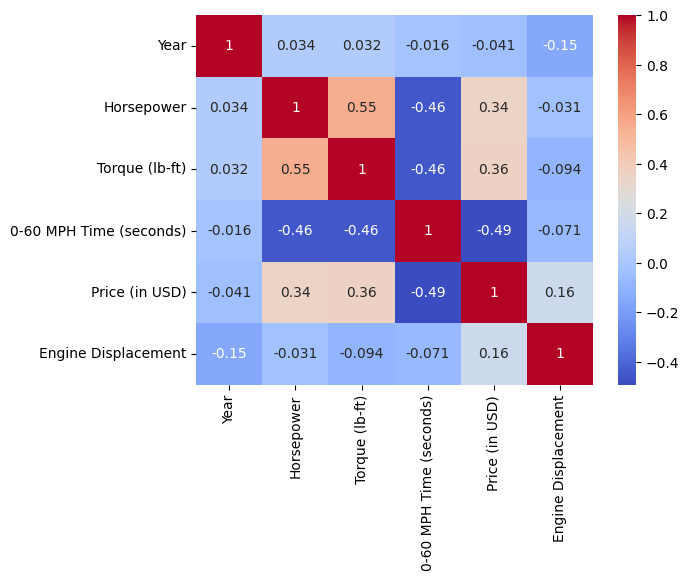

In [125]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

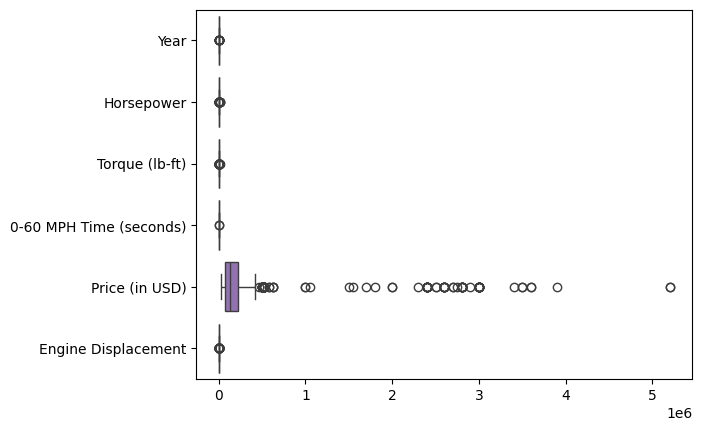

In [126]:
sns.boxplot(df, orient='h')

In [127]:
df.describe()

,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Displacement
count,719.000000,719.000000,715.0,719.000000,7.190000e+02,706.000000
mean,2021.159944,666.616134,570.858741,3.552712,3.900549e+05,4.182578
std,2.329598,681.754741,507.019542,0.806571,7.751617e+05,1.729287
min,1965.000000,181.000000,0.0,1.800000,2.500000e+04,0.000000
25%,2021.000000,454.000000,399.0,3.000000,7.010000e+04,3.350000
50%,2021.000000,591.000000,505.0,3.500000,1.341500e+05,4.000000
75%,2022.000000,710.000000,627.0,4.000000,2.250000e+05,5.200000
max,2023.000000,10000.000000,10000.0,6.500000,5.200000e+06,8.400000


Minimum value in Torque (lb-ft) feature is 0, which is impossible because every car have it. Let's change it to null value

In [128]:
df.loc[df['Torque (lb-ft)'] == 0, 'Torque (lb-ft)'] = np.nan

In [129]:
df.describe()

,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Displacement
count,719.000000,719.000000,714.0,719.000000,7.190000e+02,706.000000
mean,2021.159944,666.616134,571.658263,3.552712,3.900549e+05,4.182578
std,2.329598,681.754741,506.923729,0.806571,7.751617e+05,1.729287
min,1965.000000,181.000000,151.0,1.800000,2.500000e+04,0.000000
25%,2021.000000,454.000000,401.5,3.000000,7.010000e+04,3.350000
50%,2021.000000,591.000000,505.0,3.500000,1.341500e+05,4.000000
75%,2022.000000,710.000000,627.0,4.000000,2.250000e+05,5.200000
max,2023.000000,10000.000000,10000.0,6.500000,5.200000e+06,8.400000


Data normalization and

In [130]:
X = df.drop(columns=['Price (in USD)'])
y = df['Price (in USD)']

In [131]:
y_log = np.log(y)

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [133]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

categorical_feats = X.select_dtypes(include=['object', 'category']).columns
numerical_feats = X.select_dtypes(include=np.number).columns

# Create imputers for numerical and categorical features
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', numerical_imputer), ('scaler', StandardScaler())]), numerical_feats),
    ('cat', Pipeline([('imputer', categorical_imputer), ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_feats)
])

In [134]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [135]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)
print('R2: ', r2)

MSE:  0.03330879745163113
MAE:  0.08084417661747184
RMSE:  0.1825069791860879
R2:  0.9750942246157899


In [139]:
X_scaled = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

Cross Validation

In [140]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X_scaled, y_combined, cv=kf)

In [141]:
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")

print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results (Accuracy):
  Fold 1: 94.27%
  Fold 2: 96.14%
  Fold 3: 93.94%
  Fold 4: 91.16%
  Fold 5: 95.74%
Mean Accuracy: 94.25%
